# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 14

Número: 55853    Nome: Madalena Rodrigues    
Número: 56897    Nome: Pedro Almeida    
Número: 56935    Nome: Rómulo Nogueira  

## 1. Processamento dos dados

Neste *dataset* temos **17 variáveis independentes** (Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin) e **1 dependente** (Stage).

Cada linha do *dataset* representa o registo de um paciente (as suas características e historial clínico), para o qual se pretende classificar o estágio da doença de cirrose.

### Variáveis

**Discretas** 
* Status - C, CL, D 
* Drug - penicillamine, placebo
* Sex - M, F
* Ascites - Y, N
* Hepatomegaly - Y, N
* Spiders - Y, N
* Edema - N, S, Y

**Contínuas**  
* Age - Dias
* N_Days - Dias
* Bilirubin - [mg/dl]
* Cholesterol - [mg/dl]
* Albumin - [gm/dl]
* Copper - [ug/dia]
* Alk_Phos - [U/litro]
* SGOT - [U/ml]
* Tryglicerides - [mg/dl]
* Platelets - [ml/1000]
* Prothrombin - segundos

In [1]:
# IMPORTS
import sklearn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import operator

# poder ver mais colunas em vez de reticencias
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [2]:
df_cirrose= pd.read_csv("train.csv")
df_cirrose

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


In [3]:
cols_cont = [2,3,5,6,7,8,9] # colunas em que as variáveis têm de ser discretizadas
col_cont_names=np.array(df_cirrose.columns)[cols_cont]
print(col_cont_names)

cols_disc = [1,4,10,11,12,13,14,15,16,17,18]
col_disc_names = np.array(df_cirrose.columns)[cols_disc]
print(col_disc_names)

['Status' 'Drug' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema']
['N_Days' 'Age' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos'
 'SGOT' 'Tryglicerides' 'Platelets' 'Prothrombin']


In [4]:
X = df_cirrose.values[:,cols_cont]
y = df_cirrose.values[:,19] # 19 porque é o stage

In [5]:
# primeiro construir um dataframe para a matriz X
df_cirrose_X_cont=df_cirrose[col_cont_names]

# criar um novo DataFrame
df_cirrose_Xdum_cont = pd.get_dummies(df_cirrose_X_cont, columns = col_cont_names)

# Extrair os novos nomes das colunas
col_names_dum_cont=np.array(df_cirrose_Xdum_cont.columns)

df_cirrose_disc = df_cirrose[col_disc_names]
col_names_dum_disc=np.array(df_cirrose_disc.columns)

colunas = np.concatenate((col_names_dum_cont, col_names_dum_disc))

result = pd.concat([df_cirrose_Xdum_cont, df_cirrose_disc], axis=1)
result

,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Sex_F,Sex_M,Ascites_N,Ascites_Unknown,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2644,20296,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7
1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,3492,21915,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6
2,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1702,18806,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6
3,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,3523,14610,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2
4,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,3428,13727,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2255,22642,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0
325,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1899,14975,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0
326,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1152,25546,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9
327,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,71,18972,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6


In [6]:
def display_tree(tree, feature_names, class_names, figsize=(15,15)):
    plt.figure(figsize=figsize) # width, height in inches
    plot_tree(tree, 
          feature_names=feature_names,
          class_names=class_names,
          filled=True, rounded=True)
    plt.show()

## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação

Ao longo do relatório vamos analisar os seguintes pontos para tentar perceber a melhor forma de analisar e classificar os dados:

* Conjunto inteiro 
     * Árvores de Decisão
     * Classificadores baseados em instâncias como k-NN 
     * Naïve Bayes
* Divisao treino/teste
     * Árvores de Decisão
     * Classificadores baseados em instâncias como k-NN 
     * Naïve Bayes
* Avaliação cruzada
     * Árvores de Decisão
     * Classificadores baseados em instâncias como k-NN 
     * Naïve Bayes
* Leave one out
     * Árvores de Decisão
     * Classificadores baseados em instâncias como k-NN 
     * Naïve Bayes

### Conjunto inteiro
Nesta secção vamos testar vários modelos com o conjunto **inteiro de treino**, de modo a tirar algumas conclusões e avaliar os diferentes modelos.

##### Árvores de decisão
Ao utilizar as árvores de decisão conseguimos que o modelo se adapte a 100% ao nosso conjunto de treino fazendo assim 100% de previsões corretas. Porém isto não quer dizer que se adapte melhor ao mundo real (ou seja outro conjunto de dados).

In [7]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=2)
dtc.fit(result.values,list(y))

print('Profundidade da árvore obtida:', dtc.get_depth())
print('Número de folhas da árvore obtida:', dtc.get_n_leaves())

preds = dtc.predict(result.values)
for i in range(result.shape[0]):
    print(f"\tClasse real: {y[i]}; Previsão: {preds[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds!=y))
print("\nScore: " ,dtc.score(result.values, list(y)))

Profundidade da árvore obtida: 12
Número de folhas da árvore obtida: 95
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe real: 1.0; Previsão: 1.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 3.0; Previsão: 3.0 
	Classe real: 2.0; Previsão: 2.0 
	Classe real: 4.0; Previsão: 4.0 
	Classe re

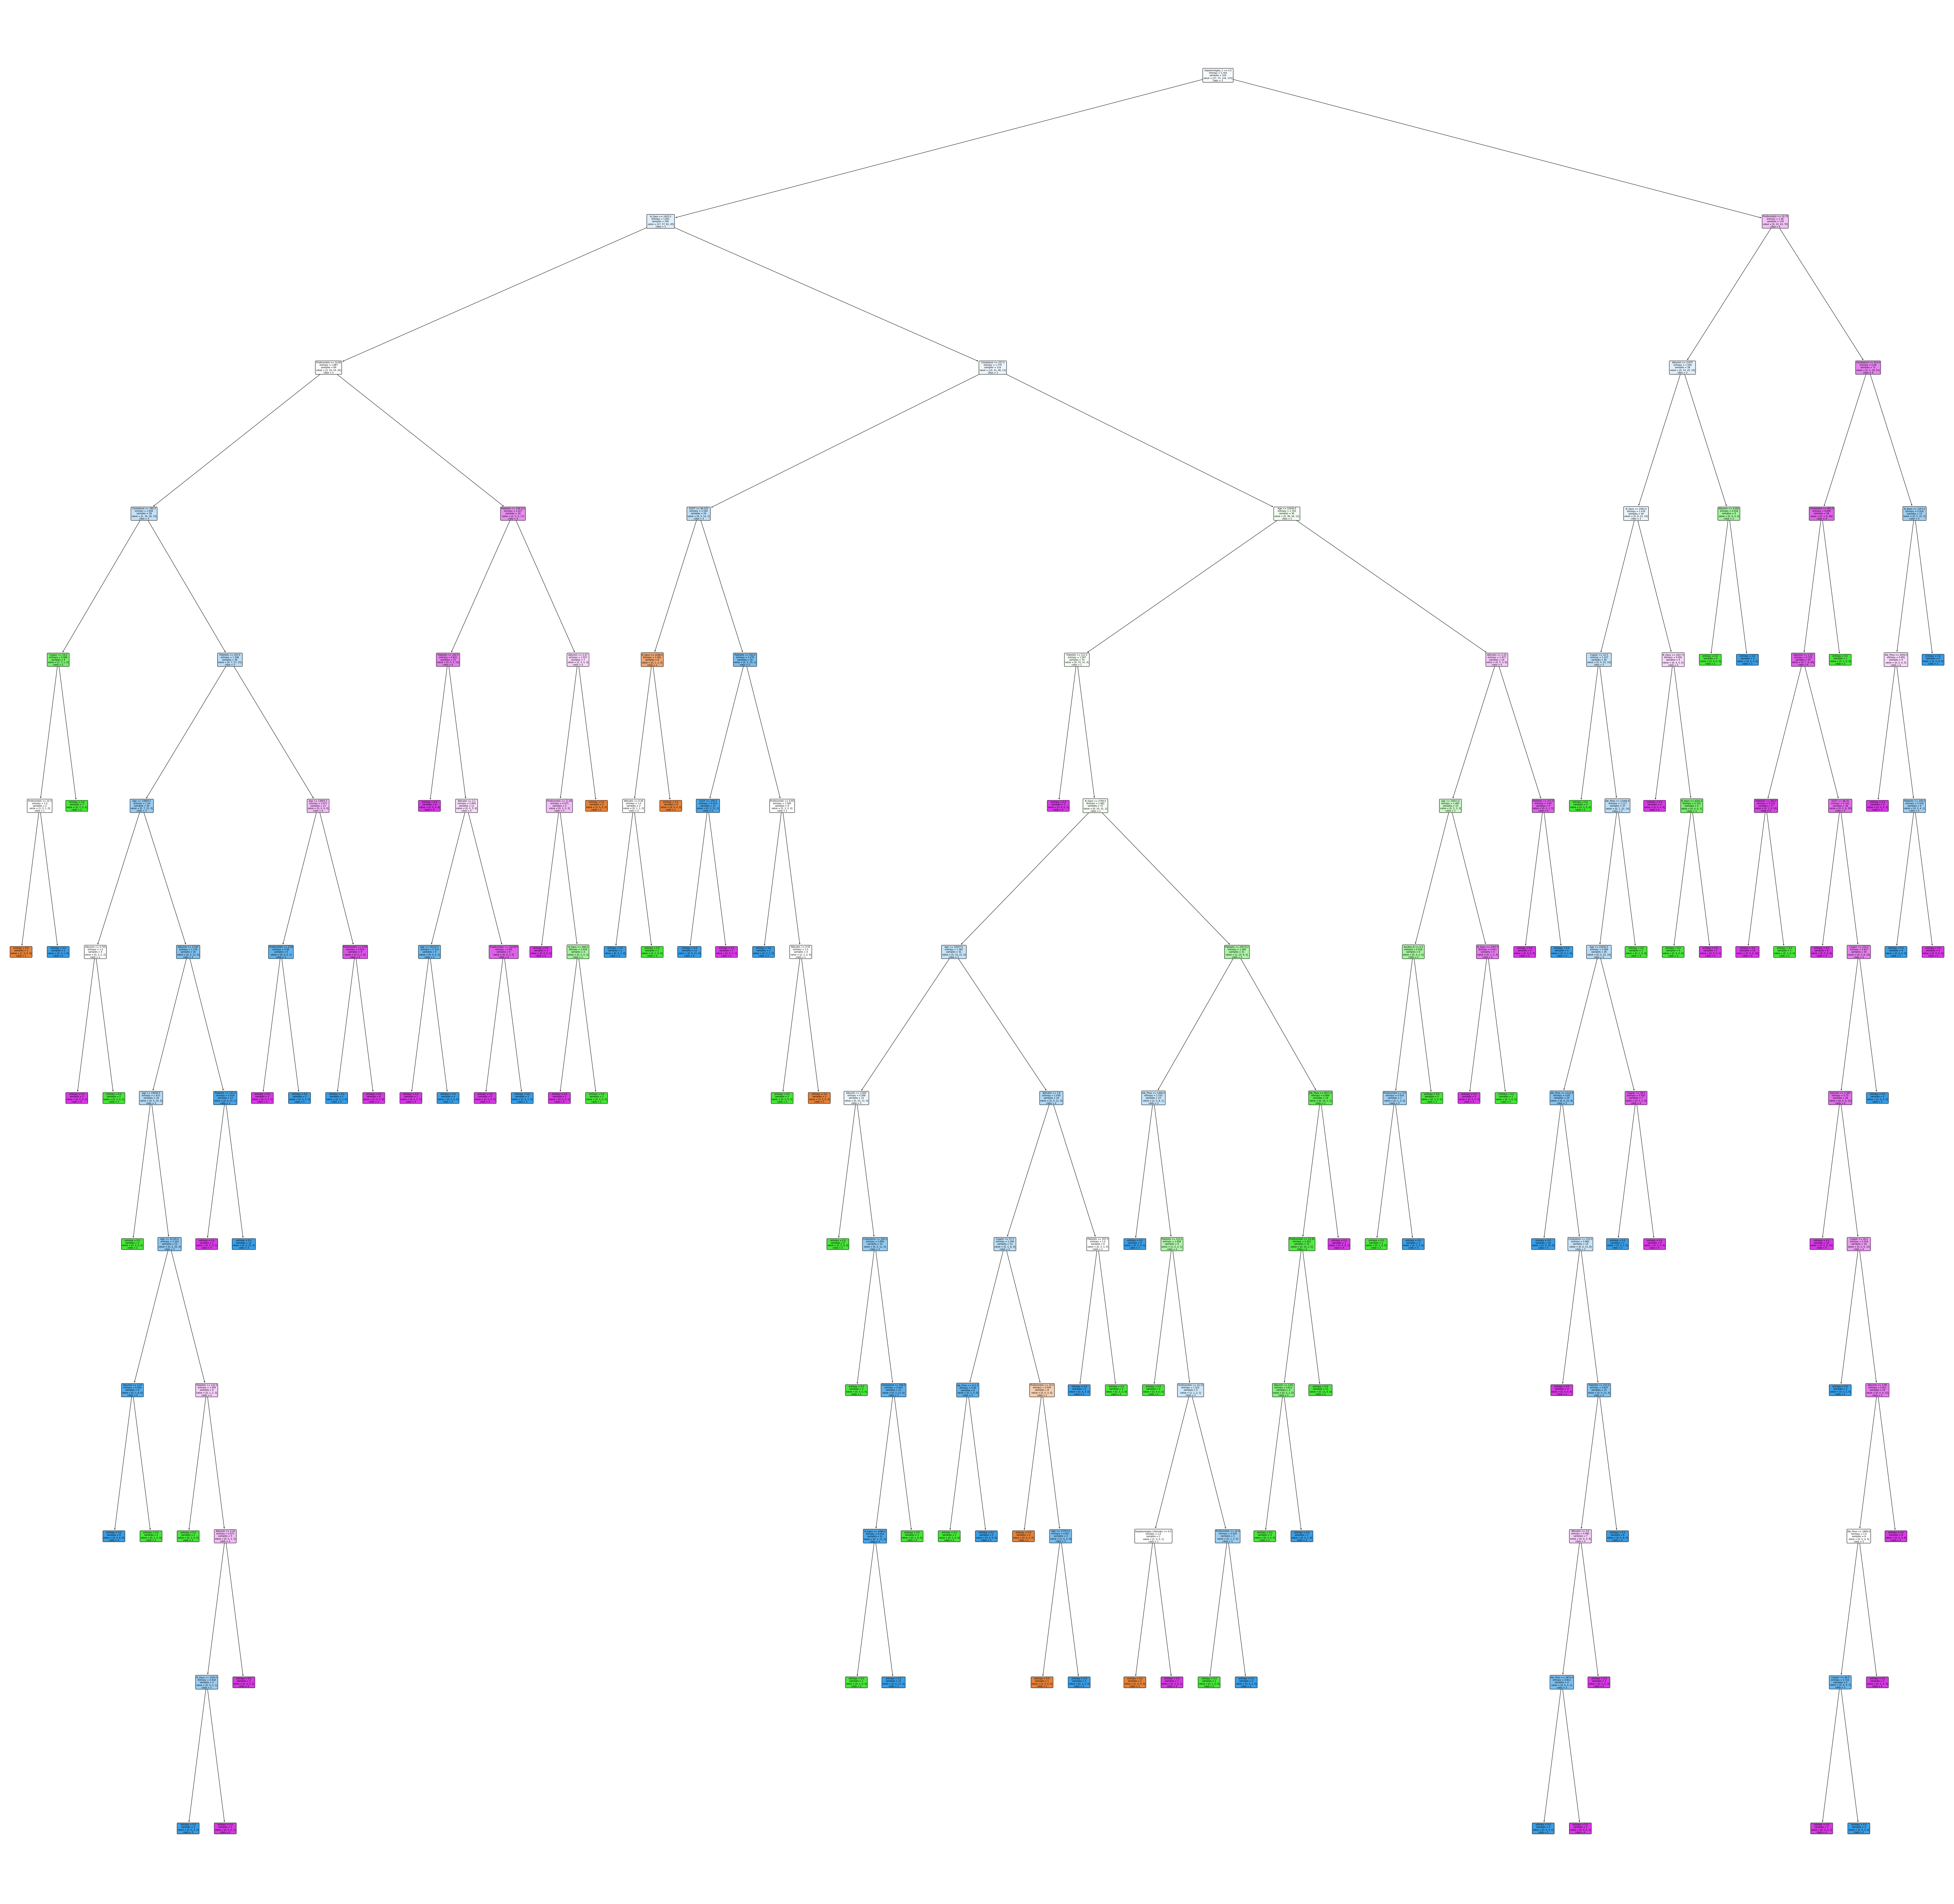

In [8]:
display_tree(dtc,colunas,["1", "2", "3", "4"], (100,100))

Sabemos agora então que a profundidade máxima da árvore é 12 e que vamos obter 95 folhas. 

Ao longo do guião iremos utilizar estes dados para testar os diferentes modelos.

##### Classificadores baseados em instâncias como k-NN 

In [9]:
cirrose_knn = KNeighborsClassifier(n_neighbors=1)
cirrose_knn.fit(result.values, list(y))

preds = cirrose_knn.predict(result.values)
for i in range(result.shape[0]):
    print(f"Classe real: {y[i]}; Previsão: {preds[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds!=y))
print("\nScore: ",cirrose_knn.score(result.values, list(y)))

Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe rea

##### Naïve Bayes

O Naive Bayes tem uma característica diferente dos outros, é praticamente imune ao overfit, e por isso é espectável que a accuracy não seja 100%

In [10]:
nb_cirrose = GaussianNB()
nb_cirrose.fit(result.values,list(y))

preds = nb_cirrose.predict(result.values)
for i in range(result.shape[0]):
    print(f"Classe real: {y[i]}; Previsão: {preds[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds!=y))
print("\nScore: ",nb_cirrose.score(result.values, list(y)))

Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 1.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 1.0 
Classe real: 3.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 3.0; Previsão: 1.0 
Classe real: 4.0; Previsão: 2.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 3.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 3.0; Previsão: 1.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 3.0; Previsão: 2.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 3.0 
Classe real: 1.0; Previsão: 1.0 
Classe real: 2.0; Previsão: 4.0 
Classe real: 2.0; Previsão: 4.0 
Classe real: 2.0; Previsão: 2.0 
Classe real: 3.0; Previsão: 3.0 
Classe real: 2.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 4.0 
Classe real: 4.0; Previsão: 2.0 
Classe real: 4.0; Previsão: 3.0 
Classe real: 4.0; Previsão: 4.0 
Classe rea

##### Comparação entre eles
Ao analisar os resultados anteriores, concluímos que 2 modelos aprendem na totalidade o conjunto de treino, porém, isso não garante que eles consigam fazer boas previsões relativamente a novos dados e, por isso, vamos testar ao longo do relatório métodos que, normalmente, são mais fiáveis quando são postos à prova com novos dados.

Já o Naive Bayes teve uma pontuação relativamente baixa de aprendizagem.

### Divisão em treino e teste
Nesta secção iremos repartir os dados em dois: 
* Conjunto de treino (75% dos dados)
* Conjunto de teste (25% dos dados)

O **conjunto de treino** irá ser ser usado para aprendizagem enquanto o **conjunto de teste** será usado para testar o nosso modelo.

Uma vez que queremos avaliar o comportamento do modelo com diferentes conjuntos, vamos variar o `random_state` da partição.

Para tirar conclusões calculamos ainda a média para cada partição.

##### Árvores de decisão
Vamos considerar 10 amostras e fazer a média de modo a que a comparação seja o mais próximo da adequada.

In [11]:
resteste = []
restreino = []

for i in range(1,11):  
    X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                        list(y),
                                                        random_state=i)

    dtc = DecisionTreeClassifier(criterion='entropy', random_state=5)
    dtc.fit(X_train,y_train)
    
    restreino.append(dtc.score(X_train, list(y_train)))
    resteste.append(dtc.score(X_test, list(y_test)))

print("A média da accuracy no conjunto de treino foi:", np.mean(restreino))
print("A média da accuracy no conjunto de teste foi:",round(np.mean(resteste),4))
print("Desvio padrão:",round(np.std(resteste),4))

A média da accuracy no conjunto de treino foi: 1.0
A média da accuracy no conjunto de teste foi: 0.441
Desvio padrão: 0.0622


Como podemos ver, a accuracy no conjunto de treino foi de 100% enquanto no conjunto de teste foi 44%, o que nos leva a crer que há a possiblidade de ter ocorrido **overfit**, ou seja, o nosso modelo possivelmente ajustou-se demasiado ao conjunto de treino, não avaliando tão bem o conjunto de teste como avaliou o de treino.

Desta forma, vamos explorar outros parâmetros das árvores de decisão que podem ser fundamentais para diminuir o overfit, ou seja, queremos que os modelos não se ajustem demasiado aos dados e que tenham alguma capacidade de generalização, i.e., de se adaptarem a dados com os quais não foram treinadas (não usados no processo de aprendizagem).

Vamos começar pela **profunidade**.

Sabemos que o modelo vai até à profundidade 12 neste conjunto de dados, por isso vamos tentar descobrir qual é a profundidade em que este é capaz de se adaptar mais (não significa que seja melhor).

In [12]:
resteste = []
restreino = []
desvio_padrao = []

for i in range(1,13):
    l_treino = []
    l_teste = []
    for j in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                            list(y),
                                                            random_state=j)
        
        dtc = DecisionTreeClassifier(criterion='entropy', random_state=5, max_depth=i)
        dtc.fit(X_train,y_train)

        l_treino.append(dtc.score(X_train, list(y_train)))
        l_teste.append(dtc.score(X_test, list(y_test)))
        
    restreino.append((i, round(np.mean(l_treino),4)))
    resteste.append((i,round(np.mean(l_teste),4)))
    desvio_padrao.append((i, round(np.std(l_teste),4)))

print("Resultados no conjunto de treino")
print(restreino)
print("--------------------------------")
print("Resultados no conjunto de teste")
print(resteste)
print("--------------------------------")
print("Resultados no conjunto de teste ordenados")
print(sorted(resteste, key= operator.itemgetter(1), reverse = True))
print("--------------------------------")
print("Desvio padrão")
print(desvio_padrao)

Resultados no conjunto de treino
[(1, 0.4907), (2, 0.5386), (3, 0.5797), (4, 0.6455), (5, 0.7268), (6, 0.815), (7, 0.887), (8, 0.937), (9, 0.9663), (10, 0.9776), (11, 0.9854), (12, 0.9898)]
--------------------------------
Resultados no conjunto de teste
[(1, 0.4602), (2, 0.4566), (3, 0.453), (4, 0.4422), (5, 0.453), (6, 0.4325), (7, 0.441), (8, 0.441), (9, 0.4337), (10, 0.4301), (11, 0.4422), (12, 0.4386)]
--------------------------------
Resultados no conjunto de teste ordenados
[(1, 0.4602), (2, 0.4566), (3, 0.453), (5, 0.453), (4, 0.4422), (11, 0.4422), (7, 0.441), (8, 0.441), (12, 0.4386), (9, 0.4337), (6, 0.4325), (10, 0.4301)]
--------------------------------
Desvio padrão
[(1, 0.0475), (2, 0.0518), (3, 0.08), (4, 0.0857), (5, 0.0598), (6, 0.0594), (7, 0.0397), (8, 0.0486), (9, 0.0642), (10, 0.0607), (11, 0.0573), (12, 0.068)]


Como é possível observar, quanto maior é a profundidade, melhor o nosso modelo se adapta ao conjunto de treino (o que já era esperado), porém foi na **profundidade 1** que obtivémos melhor accuracy no conjunto de teste. O que significa que esta profundidade, foi a que se comportou melhor face a novos dados.

Vamos agora variar o `min_samples_leaf` para ver se conseguimos alguma melhoria.

Este parâmetro define o número mínimo de exemplos nas folhas, o que signifca que o algoritmo nunca vai fazer a divisão que coloque em qualquer um dos ramos da árvore menos exemplos de treino do que o número especificado.

In [13]:
resteste = []
restreino = []

for i in range(1,50):
    l_treino = []
    l_teste = []
    for j in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                            list(y),
                                                            random_state=j)

        dtc = DecisionTreeClassifier(criterion='entropy', random_state=5, min_samples_leaf=i)
        dtc.fit(X_train,y_train)

        l_treino.append(dtc.score(X_train, list(y_train)))
        l_teste.append(dtc.score(X_test, list(y_test)))

    restreino.append((i, round(np.mean(l_treino),4)))
    resteste.append((i, round(np.mean(l_teste),4)))

print("Resultados no conjunto de treino")
print(restreino)
print("--------------------------------")
print("Resultados no conjunto de teste")
print(resteste)
print("--------------------------------")
print("Resultados no conjunto de teste ordenados")
print(sorted(resteste, key= operator.itemgetter(1), reverse = True))

Resultados no conjunto de treino
[(1, 1.0), (2, 0.9187), (3, 0.8659), (4, 0.8061), (5, 0.7667), (6, 0.7407), (7, 0.7159), (8, 0.6927), (9, 0.676), (10, 0.6602), (11, 0.648), (12, 0.6382), (13, 0.6333), (14, 0.6236), (15, 0.6179), (16, 0.6134), (17, 0.6045), (18, 0.5911), (19, 0.5858), (20, 0.5817), (21, 0.5748), (22, 0.5707), (23, 0.5715), (24, 0.5671), (25, 0.5646), (26, 0.565), (27, 0.561), (28, 0.5614), (29, 0.5561), (30, 0.5581), (31, 0.5549), (32, 0.552), (33, 0.5492), (34, 0.5472), (35, 0.5419), (36, 0.5402), (37, 0.5329), (38, 0.5317), (39, 0.5293), (40, 0.5285), (41, 0.5301), (42, 0.526), (43, 0.5256), (44, 0.5256), (45, 0.5236), (46, 0.5224), (47, 0.5215), (48, 0.5215), (49, 0.5195)]
--------------------------------
Resultados no conjunto de teste
[(1, 0.441), (2, 0.4157), (3, 0.4036), (4, 0.4241), (5, 0.4108), (6, 0.4108), (7, 0.3928), (8, 0.4024), (9, 0.4024), (10, 0.4048), (11, 0.4072), (12, 0.4108), (13, 0.4361), (14, 0.4289), (15, 0.4289), (16, 0.4289), (17, 0.4337), (18,

Percebemos com este teste que a accuracy foi diminuindo ao aumentar o  `min_samples_leaf` para o conjunto de treino e, a partir do 42, não se obteve uma accuracy superior a 53% 

Para o conjunto de teste não é possível tirar conclusões significativas, verificamos apenas que:
* Dentro de um certo intervalo de valores, a accuracy mantém-se igual
* A partir do 40 a accuracy estabiliza em 43% 
* É mais elevada no 27

Apesar de termos conseguido uma melhoria em relação ao modelo anterior quando escolhemos o valor de 27 para o `min_samples_leaf`, não conseguimos garantir uma melhoria constante, e por isso é impossível afirmar que este modelo é melhor que o anterior em todas as situações.

##### Classificadores baseados em instâncias como k-NN 

Vamos agora juntar o k-NN para nos ajudar a classificar os novos pontos e ver se melhoramos as nossas predições

O algoritmo dos k vizinhos mais próximos consiste em armazenar o conjunto de treino, e para classificar um novo ponto, o algoritmo encontra os vizinhos mais próximos no conjunto de treino. 

A versão mais simples deste algoritmo considera apenas um vizinho (k=1), que é o vizinho mais próximo no conjunto de treino do ponto que pretendemos classificar, mas podemos considerar um número k de vizinhos. 

Quando se considera mais do que um vizinho, usa-se uma votação para atribuir a classe e atribui-se a classe mais frequente entre os vizinhos mais próximos.

In [14]:
from sklearn.metrics import confusion_matrix
acc = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                        list(y),
                                                        random_state=i)
    cirrose_knn = KNeighborsClassifier(n_neighbors=1)
    cirrose_knn.fit(X_train,y_train)

    acc.append(cirrose_knn.score(X_test,y_test))
    print("Accuracy: %.3f" % cirrose_knn.score(X_test,y_test))
    
    preds = cirrose_knn.predict(X_test)
    print("\nMatriz de Confusão")
    print(pd.DataFrame(confusion_matrix(y_test, preds), columns=["1","2","3","4"], index=["1","2","3","4"]))
    print("--------------------------------")

print("Média total para k = 1:", round(np.mean(acc),4))
print("Desvio padrão total para k = 1:", round(np.std(acc),4))

Accuracy: 0.386

Matriz de Confusão
   1   2   3   4
1  0   1   4   0
2  0   3   7   7
3  0  10  14   6
4  0   4  12  15
--------------------------------
Accuracy: 0.349

Matriz de Confusão
   1  2   3   4
1  0  3   2   1
2  1  2   1   8
3  2  8  11  11
4  2  5  10  16
--------------------------------
Accuracy: 0.482

Matriz de Confusão
   1  2   3   4
1  0  2   2   1
2  1  8   7   3
3  2  5  18  10
4  1  5   4  14
--------------------------------
Accuracy: 0.386

Matriz de Confusão
   1  2   3   4
1  0  3   2   0
2  1  5   8   3
3  1  8  13   8
4  0  9   8  14
--------------------------------
Accuracy: 0.289

Matriz de Confusão
   1   2   3   4
1  0   2   3   0
2  2   5   9   4
3  0  10  16  13
4  0   3  13   3
--------------------------------
Média total para k = 1: 0.3783
Desvio padrão total para k = 1: 0.0627


Ao testar para 5 random states, verifica-se que houve bons e maus resultados, dependendo dos dados considerados em cada um. 

Percebe-se ainda que, para um só vizinho, o modelo é muito fraco!

Geralmente, recorre-se à validação cruzada (cross-validation) para escolher o k, por isso, este modelo voltará a ser explorado um pouco mais à frente neste guião, na sua versão com mais do que 1 vizinho.

##### Naïve Bayes

O Naive Bayes baseia-se no teorema de Bayes e é chamado de "naive" porque não se espera que os atributos sejam independentes, mesmo condicionados pela classe. 

No entanto, mesmo que a suposição de independência não seja verdadeira, muitas das vezes resulta em classificadores que funcionam muito bem. Uma razão para isto é que o modelo é muito simples e por isso relativamente imune a overfitting.

Como estamos a testar dados contínuos, usamos a classe `GaussianNB`

In [15]:
resteste = []
restreino = []
for i in range(1,11):  
    X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                    list(y),
                                                    random_state=i)
    nb_cirrose = GaussianNB()
    nb_cirrose.fit(X_train, y_train)

    restreino.append(nb_cirrose.score(X_train, list(y_train)))
    resteste.append(nb_cirrose.score(X_test, list(y_test)))

print("A média da accuracy no conjunto de treino foi:",round(np.mean(restreino),4))
print("A média da accuracy no conjunto de teste foi:",round(np.mean(resteste),4))
print("Desvio padrão da accuracy no conjunto de teste foi:",round(np.std(resteste),4))

A média da accuracy no conjunto de treino foi: 0.4077
A média da accuracy no conjunto de teste foi: 0.3542
Desvio padrão da accuracy no conjunto de teste foi: 0.0432


Comprovamos que existe de facto pouco overfitting ao dividir os dados em dois conjuntos, uma vez que a accuracy no conjunto de treino foi de cerca de 40% (tendo em conta os testes feitos), no entanto, o conjunto de teste, não obteve um desempenho melhor que os vistos anteriormente.

##### Comparação entre eles

Através do método de validação treino/teste podemos concluir que, ao considerar a melhor média de accuracy, o melhor modelo é a **Árvore de decisão**. Apesar de não ser espectável pode ser compreendido devido a 2 fatores: 

* Para o k-nn só testámos o modelo com um vizinho 
* O Naive Bayes adapta-se melhor ao conjunto inteiro dos dados

### Validação Cruzada

A validação cruzada consiste numa divisão do conjunto de dados em dois sub-conjuntos, um de treino e um de teste. 


No k-fold cross-validation os dados são divididos múltiplas vezes e múltiplos modelos são treinados. 

k corresponde ao número de subconjuntos obtidos. Assim, dividimos aleatoriamente o conjunto de dados em k folds (subconjuntos) independentes, onde k-1 são usados para treinar o modelo e um subconjunto (fold) é usado para testar o modelo. Este processo é repetido k vezes, obtendo k modelos e valores de exatidão para cada um.

##### Árvores de decisão

Em seguinda encontra-se um exemplo de Validação cruzada simples, em que o conjunto de dados é dividido em 2 sub-conjuntos:

In [16]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=5)
scores = cross_val_score(dtc, 
                         result.values, 
                         list(y), 
                         cv=2)
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.4121212121212121
	0.4329268292682927
Average CV accuracy: 0.423 +/- 0.010


Para ser mais fácil analisar a exatidão deste modelo precisamos de ver como o modelo se comporta quando são feitas mais divisões do conjunto de dados, dessa forma, vamos ver o K-fold cross validation.

No código seguinte, dividem-se os dados em 3, 5, 6, 9 ou 11 subconjuntos de dados e imprime-se a média da exatidão em cada um.

In [17]:
resteste = []

for i in range(3,12,2): # [3,5,7,9,11]

    dtc = DecisionTreeClassifier(criterion='entropy', random_state=5)
    scores = cross_val_score(dtc, result.values, list(y), cv=i)
    resteste.append(np.mean(scores))
    
    print('Para k =', i)
    print('CV accuracy:', *scores, sep='\n\t')
    print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print("--------------------------------")

print('Média da accuracy de entre todos os k: %.3f +/- %.3f' %(np.mean(resteste), np.std(resteste)))

Para k = 3
CV accuracy:
	0.39090909090909093
	0.34545454545454546
	0.44954128440366975
Average CV accuracy: 0.395 +/- 0.043
--------------------------------
Para k = 5
CV accuracy:
	0.3939393939393939
	0.4393939393939394
	0.4696969696969697
	0.45454545454545453
	0.47692307692307695
Average CV accuracy: 0.447 +/- 0.029
--------------------------------
Para k = 7
CV accuracy:
	0.3829787234042553
	0.3404255319148936
	0.3191489361702128
	0.425531914893617
	0.40425531914893614
	0.5106382978723404
	0.46808510638297873
Average CV accuracy: 0.407 +/- 0.063
--------------------------------
Para k = 9
CV accuracy:
	0.40540540540540543
	0.40540540540540543
	0.4594594594594595
	0.35135135135135137
	0.3783783783783784
	0.4166666666666667
	0.3333333333333333
	0.5277777777777778
	0.3333333333333333
Average CV accuracy: 0.401 +/- 0.060
--------------------------------
Para k = 11
CV accuracy:
	0.23333333333333334
	0.36666666666666664
	0.5333333333333333
	0.26666666666666666
	0.36666666666666664
	0.466

Assim, com k partições do conjunto de dados, treinámos um modelo para cada uma das partições e calculámos a accuracy para cada um dos modelos. 

Com a informação anterior calculámos o valor médio da accuracy dos k subconjuntos independentes criados para obter uma estimativa, do desempenho, mais robusta e menos sensível à partição do conjunto de dados.

Percebemos por fim que a exatidão varia dependendo da quantidade de subconjuntos. No nosso caso, k = 5 foi onde obtivémos maior accuracy.

Vamos agora revisitar o k-NN, mas desta vez, usando a validação cruzada e ver se conseguimos achar um modelo mais exato.

##### Classificadores baseados em instâncias como k-NN 

Um vez que o k-NN é altamente sensível à forma como são calculadas as distâncias, é fundamental que todos os atributos tenham valores em intervalos de igual amplitude (ranges).

Aplicamos o k-NN, com k=1, sobre este conjunto de dados e verificar o valor da accuracy média após o cross validation com k=3, k=5, k=7, k=9 e k=11

In [18]:
resteste = []

for i in range(3,12,2):

    cirrose_knn = KNeighborsClassifier(n_neighbors=1)
    scores = cross_val_score(cirrose_knn, result.values, list(y), cv=i)
    resteste.append(np.mean(scores))

    print('K =', i)
    print('CV accuracy:', *scores, sep='\n\t')
    print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print("--------------------------------")

print('Média da accuracy de entre todos os k: %.3f +/- %.3f' %(np.mean(resteste), np.std(resteste)))

K = 3
CV accuracy:
	0.36363636363636365
	0.3181818181818182
	0.44036697247706424
Average CV accuracy: 0.374 +/- 0.050
--------------------------------
K = 5
CV accuracy:
	0.3939393939393939
	0.30303030303030304
	0.3787878787878788
	0.3787878787878788
	0.46153846153846156
Average CV accuracy: 0.383 +/- 0.050
--------------------------------
K = 7
CV accuracy:
	0.3404255319148936
	0.3191489361702128
	0.3191489361702128
	0.40425531914893614
	0.3829787234042553
	0.40425531914893614
	0.40425531914893614
Average CV accuracy: 0.368 +/- 0.037
--------------------------------
K = 9
CV accuracy:
	0.35135135135135137
	0.35135135135135137
	0.24324324324324326
	0.35135135135135137
	0.5405405405405406
	0.25
	0.3888888888888889
	0.4166666666666667
	0.5
Average CV accuracy: 0.377 +/- 0.094
--------------------------------
K = 11
CV accuracy:
	0.3
	0.3333333333333333
	0.3
	0.2
	0.36666666666666664
	0.4666666666666667
	0.3333333333333333
	0.43333333333333335
	0.43333333333333335
	0.4666666666666667
	0.4

Com um só vizinho a accuracy mantém-se baixa, vamos experimentar variar os vizinhos e escolher o k mais elevado obtido na validação cruzada (K=5)

In [19]:
resteste = []

for i in range (1,100,2):
 
    cirrose_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cirrose_knn, result.values, list(y), cv=5)
    resteste.append((i, round(np.mean(scores),4)))

print(sorted(resteste, key= operator.itemgetter(1), reverse = True))

[(41, 0.4866), (47, 0.4866), (45, 0.4806), (43, 0.4805), (79, 0.4742), (39, 0.4714), (89, 0.4712), (75, 0.4682), (81, 0.4682), (91, 0.4682), (95, 0.4682), (21, 0.4681), (67, 0.4681), (97, 0.4652), (71, 0.4651), (77, 0.4651), (83, 0.4651), (51, 0.4622), (69, 0.4621), (73, 0.4621), (85, 0.4621), (93, 0.4621), (57, 0.4591), (63, 0.4591), (87, 0.4591), (99, 0.4591), (65, 0.459), (49, 0.4531), (53, 0.4531), (55, 0.453), (35, 0.4501), (17, 0.45), (27, 0.45), (59, 0.45), (61, 0.45), (19, 0.4499), (33, 0.4471), (11, 0.4469), (25, 0.4469), (29, 0.4439), (37, 0.441), (23, 0.4407), (13, 0.4347), (15, 0.4318), (31, 0.4318), (9, 0.4258), (7, 0.3923), (5, 0.3893), (1, 0.3832), (3, 0.377)]


Variando o `n_neighbors` percebemos que com 41 vizinhos atingimos a maior accuracy.

Vamos então normalizar os dados e aplicar o mesmo modelo aos dados normalizados.

Primeiro com `n_neighbors` = 1 e depois variando o `n_neighbors` 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(result.values)
standardized_data = scaler.transform(result.values)

resteste = []

for i in range(3,12,2):
    
    cirrose_knn = KNeighborsClassifier(n_neighbors=1)
    scores = cross_val_score(cirrose_knn, standardized_data, list(y), cv=i)
    resteste.append(np.mean(scores))


    print('K =', i)
    print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print("--------------------------------")

print('Média da accuracy de entre todos os k: %.3f +/- %.3f' %(np.mean(resteste), np.std(resteste)))

K = 3
Average CV accuracy: 0.392 +/- 0.048
--------------------------------
K = 5
Average CV accuracy: 0.374 +/- 0.047
--------------------------------
K = 7
Average CV accuracy: 0.368 +/- 0.071
--------------------------------
K = 9
Average CV accuracy: 0.371 +/- 0.108
--------------------------------
K = 11
Average CV accuracy: 0.374 +/- 0.090
--------------------------------
Média da accuracy de entre todos os k: 0.376 +/- 0.009


Podemos ver que houve uma pequena melhoria em relação ao teste anterior, onde os dados não tinham sido normalizados, mas não podemos concluir ainda nada, sem antes fazer o teste para mais vizinhos.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(result.values)
standardized_data = scaler.transform(result.values)

resteste = []
medias = []

for i in range(3,100,2):

    cirrose_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cirrose_knn, standardized_data, list(y), cv=5)
    resteste.append((i, round(np.mean(scores),4)))
    medias.append(np.mean(scores))

print('Accuracys ordenadas da maior para a menor:')
print(sorted(resteste, key= operator.itemgetter(1), reverse = True))
print('Média da accuracy de entre todos os k: %.3f +/- %.3f' %(np.mean(medias), np.std(medias)))

Accuracys ordenadas da maior para a menor:
[(87, 0.4927), (9, 0.4926), (95, 0.4925), (85, 0.4835), (75, 0.4806), (97, 0.4804), (99, 0.4804), (81, 0.4775), (89, 0.4774), (91, 0.4773), (93, 0.4773), (73, 0.4745), (69, 0.4714), (77, 0.4714), (83, 0.4684), (37, 0.4682), (71, 0.4653), (79, 0.4653), (47, 0.4651), (15, 0.4621), (41, 0.4621), (45, 0.4621), (11, 0.462), (5, 0.4593), (7, 0.4592), (13, 0.4592), (39, 0.4591), (67, 0.4562), (35, 0.4561), (49, 0.4531), (33, 0.4499), (43, 0.4469), (29, 0.4468), (19, 0.444), (51, 0.444), (65, 0.444), (59, 0.4439), (17, 0.441), (61, 0.4378), (63, 0.4378), (23, 0.4348), (21, 0.4318), (31, 0.4317), (25, 0.4287), (27, 0.4225), (55, 0.4135), (53, 0.4105), (57, 0.4105), (3, 0.4043)]
Média da accuracy de entre todos os k: 0.456 +/- 0.022


Para k=87 e com os dados normalizados obtivémos a maior accuracy até ao momento!

##### Naïve Bayes

In [22]:
resteste = []
for i in [5,10]:  

    nb_cirrose = GaussianNB()
    scores = cross_val_score(nb_cirrose, result.values, list(y), cv=i)
    resteste.append(np.mean(scores))

print("A média da accuracy no conjunto de teste foi:",round(np.mean(resteste),4))
print("O desvio padrão da accuracy no conjunto de teste foi:",round(np.std(resteste),4))

A média da accuracy no conjunto de teste foi: 0.3343
O desvio padrão da accuracy no conjunto de teste foi: 0.0001


Apesar de não ter uma accuracy muito elevada, o naive bayes aparenta ser consistente devido ao baixo valor de desvio padrão.

##### Comparação entre eles

Através da validação cruzada concluimos que até ao momento o melhor modelo é o K-nn com os dados normalizados e k = 87.

### Leave-One-Out

A validação leave-one-out (LOO) é muito semelhante ao K-fold CV explicado anteriormente, mas difere no valor de k, já que o K é igual ao número total de dados e o modelo é ajustado tantas vezes quantas as instâncias no conjunto dos dados

##### Árvores de decisão

Em seguinda encontra-se um exemplo de Validação cruzada simples, em que o conjunto de dados é dividido no número de amostras existentes treino e teste:

In [23]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(result.values)

treino = []
teste = []
for train_index, test_index in loo.split(result.values):
    for i in range(1,11):

        X_train, X_test = result.values[train_index], result.values[test_index]
        y_train, y_test = y[train_index], y[test_index]

        dtc = DecisionTreeClassifier(criterion='entropy', random_state=i)
        dtc.fit(X_train,list(y_train))
    
        treino.append(dtc.score(X_train, list(y_train)))
        teste.append(dtc.score(X_test, list(y_test)))

    
print("A média da accuracy no conjunto de treino foi:", np.mean(treino))    
print("A média da accuracy no conjunto de teste foi:", round(np.mean(teste),4))

A média da accuracy no conjunto de treino foi: 1.0
A média da accuracy no conjunto de teste foi: 0.4152


Este teste é mais um bom exemplo de que modelos como o Leave One Out são bons a combater o overfit, dado que a accuracy no conjunto de treino é de 100% mas no de teste foi apenas de 41%

Assim, com k partições do conjunto de dados, em que k = número total de dados, treinámos um modelo para cada uma das partições e calculámos a accuracy média dos modelos.

Com a informação anterior calculámos o valor médio da accuracy dos k subconjuntos independentes criados para obter uma estimação do desempenho, mais robusta e menos sensível à partição do conjunto de dados, que embora seja semelhate ao K-Fold é mais precisa, já que executa partições para todos os dados, mas com a desvantagem ser computacionalmente mais despendiosa.

Vamos agora revisitar o k-NN, mas desta vez, usando o Leave-One-Out e ver se conseguimos encontrar um modelo mais exato.

##### Classificadores baseados em instâncias como k-NN 

Aplicamos o k-NN, com k=1, sobre este conjunto de dados e verificar o valor da accuracy média após o **Leave-One-Out**.

In [24]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(result.values)


treino = []
teste = []
resteste = []
restreino = []

for train_index, test_index in loo.split(result.values):

    X_train, X_test = result.values[train_index], result.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train=y_train.astype('int')

    cirrose_knn = KNeighborsClassifier(n_neighbors=1)
    cirrose_knn.fit(X_train,y_train)

    restreino.append(cirrose_knn.score(X_train, list(y_train)))
    resteste.append(cirrose_knn.score(X_test, list(y_test)))

        
print("A média da accuracy no conjunto de treino com 1 vizinho foi:",np.mean(restreino))
print("A média da accuracy no conjunto de teste com 1 vizinho foi:",np.mean(resteste))

A média da accuracy no conjunto de treino com 1 vizinho foi: 1.0
A média da accuracy no conjunto de teste com 1 vizinho foi: 0.3556231003039514


Com um só vizinho a accuracy mantém-se baixa, vamos experimentar variar os vizinhos e ver qual a accuracy média obtida com o Leave-One-Out.

In [25]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(result.values)

treino = []
teste = []
resteste = []
restreino = []
for train_index, test_index in loo.split(result.values):
    for i in range (3,12,2):

        X_train, X_test = result.values[train_index], result.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_train=y_train.astype('int')

        cirrose_knn = KNeighborsClassifier(n_neighbors=i)
        cirrose_knn.fit(X_train,y_train)
        
        restreino.append(cirrose_knn.score(X_train, list(y_train)))
        resteste.append(cirrose_knn.score(X_test, list(y_test)))

        
print("A média da accuracy no conjunto de treino com vizinhos k=3, k=5, k=7, k=9 e k=11 vizinhos foi:",np.mean(restreino))
print("A média da accuracy no conjunto de teste com vizinhos k=3, k=5, k=7, k=9 e k=11 vizinhos foi:",np.mean(resteste))

A média da accuracy no conjunto de treino com vizinhos k=3, k=5, k=7, k=9 e k=11 vizinhos foi: 0.5962580621246942
A média da accuracy no conjunto de teste com vizinhos k=3, k=5, k=7, k=9 e k=11 vizinhos foi: 0.39574468085106385


Após este teste, podemos reparar que com mais vizinhos existe uma distribuição dos dados pelas classes bastante mais precisa e aproximada da realidade do que com apenas 1 vizinho.

##### Naïve Bayes

No Naïve Bayes não se esperam resultados superiores aos obtidos anteriormente, já que é usado o GaussianNB para conjuntos de dados com atributos contínuos, mas os nossos dados também existem conjuntos de dados categóricos.

In [26]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(result.values)

resteste = []
restreino = []

for train_index, test_index in loo.split(result.values):

    X_train, X_test = result.values[train_index], result.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train=y_train.astype('int')

    nb_cirrose = GaussianNB()
    nb_cirrose.fit(X_train, y_train)

    restreino.append(nb_cirrose.score(X_train, list(y_train)))
    resteste.append(nb_cirrose.score(X_test, list(y_test)))


print("A média da accuracy no conjunto de treino foi:",np.mean(restreino))
print("A média da accuracy no conjunto de teste foi:",np.mean(resteste))

A média da accuracy no conjunto de treino foi: 0.3866391133516199
A média da accuracy no conjunto de teste foi: 0.3282674772036474


##### Comparação entre eles

O melhor resultado obtido foi com árvore de decisão, o que é lógico, já que as árvores de decisão têm tendência para fazer overfitting, seguidamente foi o K-NN para vários vizinhos e por fim o Naïve Bayes, que é usado para para conjuntos de dados com atributos contínuos, mas nos nossos dados também existem conjuntos de dados categóricos e por foi o que obteve uma menor accuracy.

### 2.2. Seleção e apresentação do melhor modelo

O melhor modelo que obtivemos no relatório, para estes dados, foi o k-NN com 87 vizinhos e um k = 5 para o cross validation, com os dados normalizados.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(result.values)
standardized_data = scaler.transform(result.values)

cirrose_knn = KNeighborsClassifier(n_neighbors=87)
scores = cross_val_score(cirrose_knn, standardized_data, list(y), cv=5)

print("Desvio padrão dos dados:", np.std(standardized_data))
print("Variância dos dados:", np.var(standardized_data))
print('Média da accuracy de entre todos os k: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Desvio padrão dos dados: 1.0
Variância dos dados: 1.0
Média da accuracy de entre todos os k: 0.493 +/- 0.059


Este modelo obteve melhores resultados, uma vez que:

* Os dados estão normalizados (temos uma distribuição de dados com desvio padrão e variância = 1)
* O K-fold Cross validation divide os dados em 5 grupos, sendo um subconjunto dentro de cada um utilizado para teste e os k-1 restantes, utilizados para estimar a accuracy
* O k-NN com 87 vizinhos obtem um maior concenso na decisão da classificação de um novo ponto

## 3. Validação do modelo final ajustado com um conjunto de validação independente

Para facilitar as submissões, criámos uma função auxiliar que cria o .txt

In [29]:
def constroi_txt(arr, num):
    f = open("submission_"+ str(num)+ ".txt", 'w')
    f.write("ID,Stage\n")
    comeco = 329
    for l in arr:
        f.write(str(comeco) + "," + str(int(l)) + '\n')
        comeco +=1

Preparação do *dataset*

In [30]:
df_cirrose_comp= pd.read_csv("test.csv")

cols_cont_comp = [2,3,5,6,7,8,9] # colunas em que as variáveis têm de ser discretizadas
col_cont_names_comp=np.array(df_cirrose_comp.columns)[cols_cont_comp]

cols_disc_comp = [1,4,10,11,12,13,14,15,16,17,18]
col_disc_names_comp = np.array(df_cirrose_comp.columns)[cols_disc_comp]

X_comp = df_cirrose_comp.values[:,cols_cont_comp]

# primeiro construir um dataframe para a matriz X
df_cirrose_X_cont_comp=df_cirrose_comp[col_cont_names_comp]
# criar um novo DataFrame
df_cirrose_Xdum_cont_comp = pd.get_dummies(df_cirrose_X_cont_comp, columns = col_cont_names_comp)
# Extrair os novos nomes das colunas
col_names_dum_cont_comp=np.array(df_cirrose_Xdum_cont_comp.columns)

df_cirrose_disc_comp = df_cirrose_comp[col_disc_names_comp]
col_names_dum_disc_comp=np.array(df_cirrose_disc_comp.columns)

colunas_comp = np.concatenate((col_names_dum_cont_comp, col_names_dum_disc_comp))

result_comp = pd.concat([df_cirrose_Xdum_cont_comp, df_cirrose_disc_comp], axis=1)
result_comp

,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Sex_F,Sex_M,Ascites_N,Ascites_Unknown,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,939,22767,1.7,434.000000,3.35,39.000000,1713.000000,171.000000,100.000000,234.00000,10.2
1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1302,22111,6.6,1000.000000,3.07,88.000000,3150.000000,193.000000,133.000000,299.00000,10.9
2,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1443,14975,1.2,369.510563,2.80,97.648387,1982.655769,122.556346,124.702128,120.00000,11.0
3,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2944,14812,1.9,448.000000,3.83,60.000000,1052.000000,127.100000,175.000000,181.00000,9.8
4,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,3853,19025,0.8,276.000000,3.60,54.000000,4332.000000,99.330000,143.000000,273.00000,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1297,18719,7.3,426.000000,3.93,262.000000,2424.000000,145.700000,218.000000,252.00000,10.5
79,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2576,17323,0.5,316.000000,3.65,68.000000,1716.000000,187.550000,71.000000,356.00000,9.8
80,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,2111,19724,1.0,369.510563,3.60,97.648387,1982.655769,122.556346,124.702128,257.02457,12.1
81,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,2812,18628,3.4,369.510563,3.92,97.648387,1982.655769,122.556346,124.702128,257.02457,9.3


O modelo seguinte foi o que apresentou melhores resultados na competição

In [31]:
nb_cirrose_competicao = GaussianNB()
nb_cirrose_competicao.fit(result.values,list(y))

p = nb_cirrose_competicao.predict(result_comp.values)

## 4. Competição

Apesar do modelo obtido no ponto 2.2 ter sido o melhor na execução dos testes com o ficheiro 'train.csv', não se comportou tão bem com o ficheiro 'test.cv' e, por isso, testámos também os outros modelos estudados a cima, e conseguimos obter a nossa melhor pontuação com um simples Naive Bayes. Treinámos o modelo com o conjunto inteiro do 'train.csv'.


Modelo correspondente à submissão 16 - 0,46800

In [33]:
nb_cirrose_competicao = GaussianNB()
nb_cirrose_competicao.fit(result.values,list(y))

p = nb_cirrose_competicao.predict(result_comp.values)

constroi_txt(p,"final")

Modelo correspondente à submissão 20 - 0,43468

In [34]:
X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                    list(y),
                                                    random_state=8,
                                                    test_size=0.75,
                                                    train_size=0.25)

cirrose_knn = KNeighborsClassifier(n_neighbors=9)
cirrose_knn.fit(X_train,y_train)

p = cirrose_knn.predict(result_comp.values)

constroi_txt(p,"final_segundo")

Testámos diversos modelos em que variámos inúmeros parâmetros, mas estes foram os que obtiveram os melhores resultados de entre todas as tentativas. 

Não conseguímos obter valores de accuracy muito elevados apesar de todos os testes feitos.

Exemplos de testes:
* Alterar a percentagem na partição de treino/teste e usar K-nn e Naive Bayes
* Uma função que altera o número de vizinhos do K-nn e devolve o que tem melhor accuracy

In [35]:
resteste = []
restreino = []

c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in range(1,50):
    l_treino = []
    l_teste = []
    for j in range(9):
        X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                            list(y),
                                                            random_state=i,
                                                            train_size=c[j])

        dtc = GaussianNB()
        dtc.fit(X_train,y_train)

        l_treino.append(dtc.score(X_train, list(y_train)))
        l_teste.append(dtc.score(X_test, list(y_test)))

    restreino.append(((i,c[j]), round(np.mean(l_treino),4)))
    resteste.append(((i,c[j]), round(np.mean(l_teste),4)))

# print("Resultados no conjunto de treino")
# print(restreino)
# print("--------------------------------")
# print("Resultados no conjunto de teste")
# print(resteste)
# print("--------------------------------")
print("Resultados no conjunto de teste ordenados")
print(sorted(resteste, key= operator.itemgetter(1), reverse = True))

Resultados no conjunto de teste ordenados
[((10, 0.9), 0.3977), ((26, 0.9), 0.395), ((9, 0.9), 0.3941), ((5, 0.9), 0.394), ((38, 0.9), 0.3906), ((48, 0.9), 0.3862), ((32, 0.9), 0.3825), ((15, 0.9), 0.3815), ((47, 0.9), 0.3766), ((29, 0.9), 0.3765), ((12, 0.9), 0.3759), ((8, 0.9), 0.3757), ((46, 0.9), 0.3753), ((21, 0.9), 0.373), ((16, 0.9), 0.3707), ((30, 0.9), 0.3702), ((6, 0.9), 0.3668), ((49, 0.9), 0.3612), ((40, 0.9), 0.3599), ((11, 0.9), 0.3573), ((19, 0.9), 0.3571), ((39, 0.9), 0.3538), ((41, 0.9), 0.3522), ((37, 0.9), 0.3497), ((22, 0.9), 0.3484), ((13, 0.9), 0.3449), ((43, 0.9), 0.3447), ((1, 0.9), 0.3428), ((34, 0.9), 0.341), ((4, 0.9), 0.3394), ((42, 0.9), 0.3384), ((28, 0.9), 0.3369), ((27, 0.9), 0.3357), ((3, 0.9), 0.3338), ((7, 0.9), 0.3333), ((14, 0.9), 0.333), ((33, 0.9), 0.3314), ((2, 0.9), 0.3312), ((36, 0.9), 0.3307), ((31, 0.9), 0.3295), ((24, 0.9), 0.3284), ((25, 0.9), 0.3196), ((18, 0.9), 0.3117), ((20, 0.9), 0.3117), ((23, 0.9), 0.3086), ((35, 0.9), 0.3086), ((44,

In [36]:
list_floats = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.8,0.85,0.9,0.95]

total = []

for r in range(1, 21): # varia o random state
    l = []
    # print("Random:", r)
    for v in range (1, 12, 2):
        # print("\tVizinhos:", v)
        for i in list_floats:
            X_train, X_test, y_train, y_test = train_test_split(result.values,
                                                                    list(y),
                                                                    random_state=r, 
                                                                    train_size=i,
                                                                    test_size=1-i)
            cirrose_knn = KNeighborsClassifier(n_neighbors=v)
            cirrose_knn.fit(X_train,y_train)

            l.append(("Treino: "+str(i)+" Teste:"+str(round(1-i, 2)),  round(cirrose_knn.score(X_test,y_test), 3)))

            total.append(("Random: "+str(r)+" Vizinhos "+str(v)+" Treino: "+str(i)+" Teste:"+str(round(1-i, 2)),  round(cirrose_knn.score(X_test,y_test), 3)))
        ordenado = sorted(l, key= operator.itemgetter(1), reverse = True)
        # print("\t\t", ordenado[:5])

total_ord = sorted(total, key= operator.itemgetter(1), reverse = True)
for item in total_ord:
    print(item)

('Random: 6 Vizinhos 3 Treino: 0.95 Teste:0.05', 0.647)
('Random: 9 Vizinhos 11 Treino: 0.95 Teste:0.05', 0.647)
('Random: 9 Vizinhos 1 Treino: 0.95 Teste:0.05', 0.588)
('Random: 9 Vizinhos 9 Treino: 0.95 Teste:0.05', 0.588)
('Random: 5 Vizinhos 9 Treino: 0.9 Teste:0.1', 0.576)
('Random: 6 Vizinhos 3 Treino: 0.9 Teste:0.1', 0.545)
('Random: 6 Vizinhos 5 Treino: 0.9 Teste:0.1', 0.545)
('Random: 17 Vizinhos 5 Treino: 0.7 Teste:0.3', 0.535)
('Random: 6 Vizinhos 1 Treino: 0.95 Teste:0.05', 0.529)
('Random: 7 Vizinhos 11 Treino: 0.95 Teste:0.05', 0.529)
('Random: 9 Vizinhos 5 Treino: 0.95 Teste:0.05', 0.529)
('Random: 9 Vizinhos 7 Treino: 0.95 Teste:0.05', 0.529)
('Random: 13 Vizinhos 5 Treino: 0.95 Teste:0.05', 0.529)
('Random: 17 Vizinhos 9 Treino: 0.95 Teste:0.05', 0.529)
('Random: 18 Vizinhos 3 Treino: 0.95 Teste:0.05', 0.529)
('Random: 19 Vizinhos 1 Treino: 0.95 Teste:0.05', 0.529)
('Random: 19 Vizinhos 9 Treino: 0.95 Teste:0.05', 0.529)
('Random: 20 Vizinhos 9 Treino: 0.95 Teste:0.05'